In [9]:
from scipy import integrate
from itertools import product
import matplotlib.pyplot as plt
import matplotlib as mpl
from cycler import cycler

In [7]:
import numpy as np
npz = np.load('part1a.npz')
lst = npz.files


for item in lst:
  print(item)
  print(npz[item])

N = npz ['N']
SVC_0_pmf = npz['Svc_0_pmf']
Lc = npz['Lc'] 
Ic_0 = npz['Ic_0']
gamma = npz['gamma']



N
100000.0
Svc_0_pmf
[[0.10953309 0.03300776 0.08179044 0.11593994]
 [0.03089752 0.08511994 0.04528764 0.05718283]
 [0.07471465 0.02495643 0.10236599 0.04256696]
 [0.01605863 0.08109608 0.09158212 0.00789999]]
Lc
[0.3 0.4 0.7 1. ]
Ic_0
[47 90 51 65]
gamma
0.07142857142857142


### Relavent information 
-  Lc is the viral load for a person in the comorbidity compartment c.
- γ is the reciprocal of the typical time until an infected person recovers (or succumbs)
- The known model parameters are the 
    - **initial susceptible populations** in each compartment in each leaf node, 
    - the **initial infected populations Ic** in each leaf node, Lc values and γ
    - assume that **initial recovered populations are zero** (i.e. R = 0) and that initially Sv,c >> Ic for all v and c, therefore N = sum S sub 0 v and c 

- What is not known 
    - Bvc 

- SVC PMF 
    - Probability Distribution is a statistical function which links or lists all the possible outcomes a random variable can take, in any random process, with its corresponding probability of occurrence.

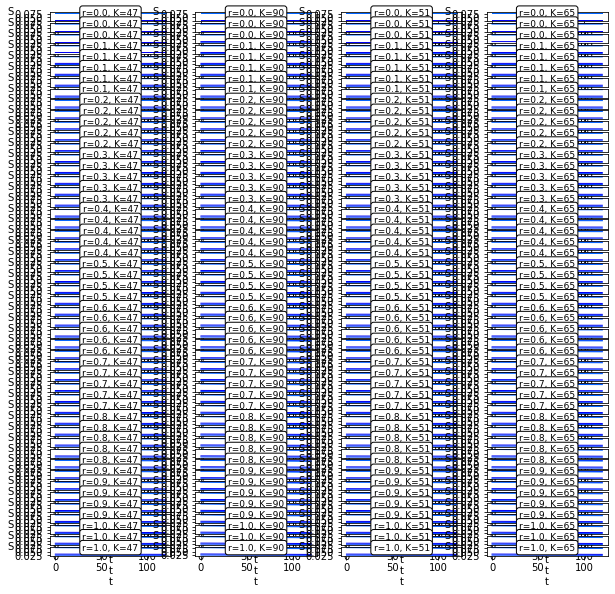

In [12]:

color = plt.cm.jet(np.linspace(0.1,0.9,20))
mpl.rcParams['axes.prop_cycle'] = cycler('color', color)


plt.figure(figsize=(10,10))

# we will plot for all these different parameters 
# to see how they affect the behavior of the ODE
B_values=np.linspace(0,1,50)
I_values = Ic_0
# asusme S0 = N 


t=np.linspace(0,120,120)
S0 =SVC_0_pmf[:, 1]

for combination_index, (B,I) in enumerate(product(B_values,I_values)):
    func=lambda t,S : -((B * S * I)/N) # defines the RHS of the ODE
    
    # solve the (I)nitial (V)alue (P)roblem
    # first arg: RHS of ODE
    # second arg: 2-tuple of first and last time points
    # third arg: initial values
    # dense_output enables us to evaluate later at any time step
    soln_obj=integrate.solve_ivp(func, (t[0],t[-1]), S0, dense_output=True)

    plt.subplot(len(B_values), len(I_values), combination_index+1)
    plt.plot(t, soln_obj.sol(t).T, linewidth=1)
    plt.annotate(f"r={B:.1f}, K={int(I):d}", xy=(0.5, 0.9), \
                xycoords='axes fraction', size=9, ha='center', \
                va='center', bbox=dict(boxstyle='round', fc='w'))
    plt.xlabel("t")
    plt.ylabel("S").set_rotation(0)
plt.tight_layout()
plt.show()